In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?

In [9]:
df.groupby("gender").mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [10]:
df.groupby("race/ethnicity").mean()

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [11]:
df.groupby("parental level of education").mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


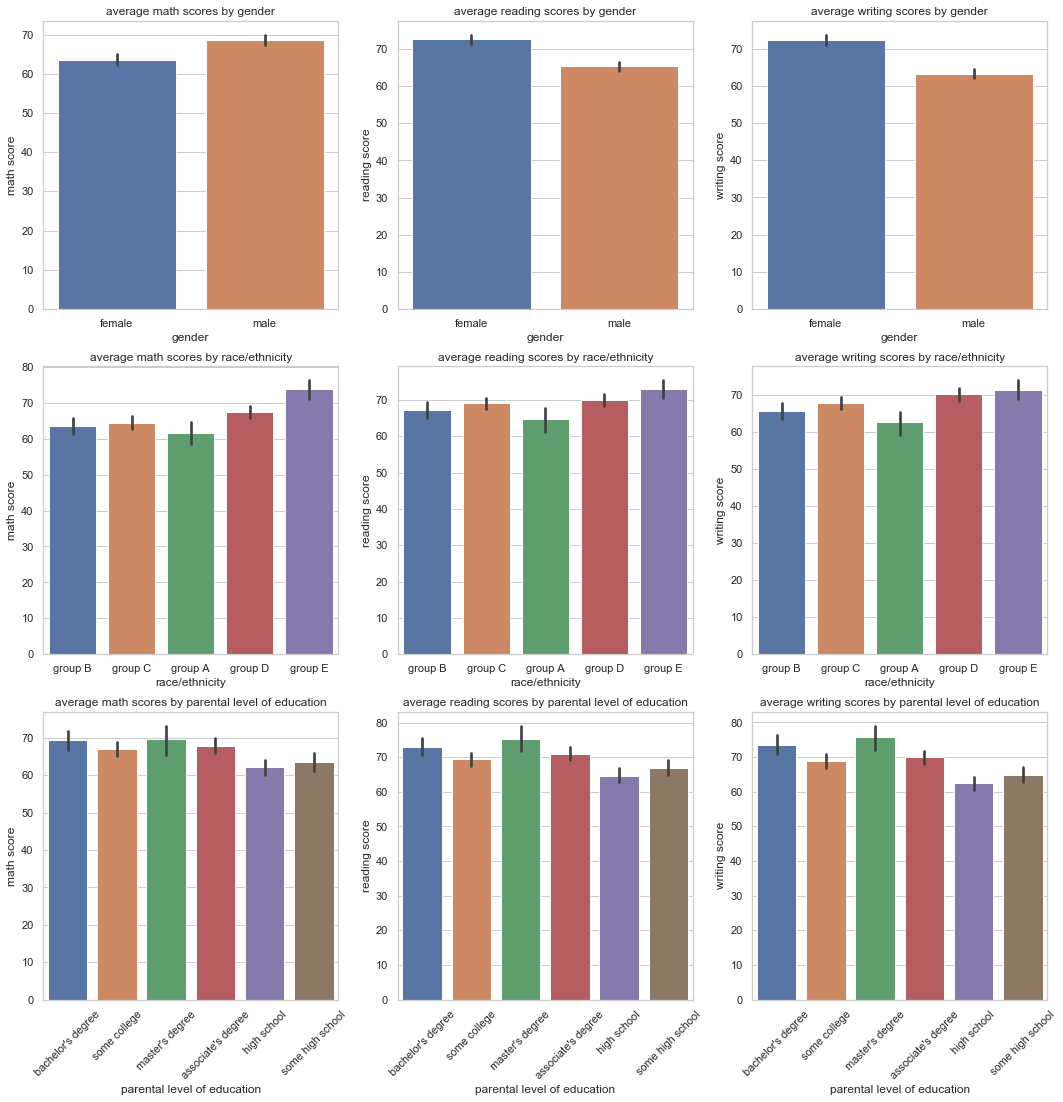

In [28]:
plt.figure(figsize=(18,18))

plt.subplot(3,3,1)
sns.barplot(df["gender"], df["math score"])
plt.title("average math scores by gender")

plt.subplot(3,3,2)
sns.barplot(df["gender"], df["reading score"])
plt.title("average reading scores by gender")

plt.subplot(3,3,3)
# draw the heatmap using seaborn.
sns.barplot(df["gender"], df["writing score"])
plt.title("average writing scores by gender")

plt.subplot(3,3,4)
sns.barplot(df["race/ethnicity"], df["math score"])
plt.title("average math scores by race/ethnicity")

plt.subplot(3,3,5)
sns.barplot(df["race/ethnicity"], df["reading score"])
plt.title("average reading scores by race/ethnicity")

plt.subplot(3,3,6)
sns.barplot(df["race/ethnicity"], df["writing score"])
plt.title("average writing scores by race/ethnicity")

plt.subplot(3,3,7)
sns.barplot(df["parental level of education"], df["math score"])
plt.xticks(rotation=45)
plt.title("average math scores by parental level of education")

plt.subplot(3,3,8)
sns.barplot(df["parental level of education"], df["reading score"])
plt.xticks(rotation=45)
plt.title("average reading scores by parental level of education")

plt.subplot(3,3,9)
sns.barplot(df["parental level of education"], df["writing score"])
plt.xticks(rotation=45)
plt.title("average writing scores by parental level of education")

plt.show()

In [ ]:
# Test whether group differences are significant.
lunch_options = df["lunch"].unique()
grouped_df = df.groupby("lunch")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(lunch_options)):
        for j in range(i+1, len(lunch_options)):
            print("t-test between groups {0} and {1}:".format(lunch_options[i], lunch_options[j]))
            print(stats.ttest_ind(
                df[df["lunch"]==lunch_options[i]][var], 
                df[df["lunch"]==lunch_options[j]][var]
            ))

# Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?

In [25]:
df.groupby("lunch").mean()

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


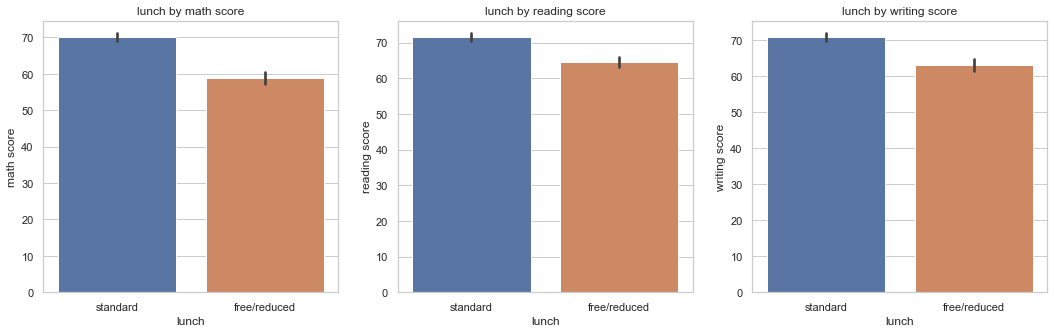

In [29]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(df["lunch"], df["math score"])
plt.title("lunch by math score")

plt.subplot(1,3,2)
sns.barplot(df["lunch"], df["reading score"])
plt.title("lunch by reading score")

plt.subplot(1,3,3)
sns.barplot(df["lunch"], df["writing score"])
plt.title("lunch by writing score")

plt.show()

In [31]:
# Test whether group differences are significant.
lunch_options = df["lunch"].unique()
grouped_df = df.groupby("lunch")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(lunch_options)):
        for j in range(i+1, len(lunch_options)):
            print("t-test between groups {0} and {1}:".format(lunch_options[i], lunch_options[j]))
            print(stats.ttest_ind(
                df[df["lunch"]==lunch_options[i]][var], 
                df[df["lunch"]==lunch_options[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups standard and free/reduced:
Ttest_indResult(statistic=11.837180472914612, pvalue=2.4131955993137074e-30)
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-test between groups standard and free/reduced:
Ttest_indResult(statistic=7.451056467473455, pvalue=2.0027966545279011e-13)
------------------------------------------------
Comparisons for variable: writing score
------------------------------------------------
t-test between groups standard and free/reduced:
Ttest_indResult(statistic=8.009784197834758, pvalue=3.186189583166477e-15)


- #### Students who get standard lunches score higher on all three tests. The correlation could lie in the fact that students from lower incomes (lower education) homes are given free lunches from public schools because of the need for financial support. Due to the lack of emphasis on education in the home, the students score lower on tests.

# Does the test preparation course seem to have an effect on the exam performances?

In [32]:
df.groupby("test preparation course").mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


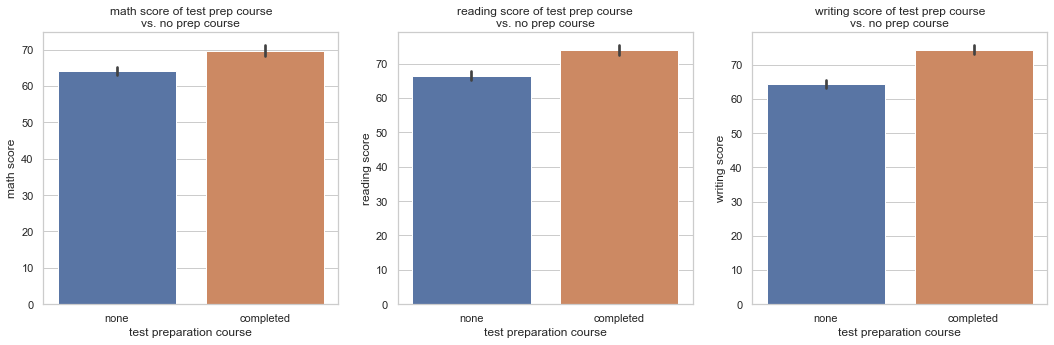

In [33]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(df["test preparation course"], df["math score"])
plt.title("math score of test prep course\nvs. no prep course")

plt.subplot(1,3,2)
sns.barplot(df["test preparation course"], df["reading score"])
plt.title("reading score of test prep course\nvs. no prep course")

plt.subplot(1,3,3)
sns.barplot(df["test preparation course"], df["writing score"])
plt.title("writing score of test prep course\nvs. no prep course")

plt.show()

In [34]:
# Test whether group differences are significant.
test_prep_or_not = df["test preparation course"].unique()
grouped_df = df.groupby("test preparation course")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(test_prep_or_not)):
        for j in range(i+1, len(test_prep_or_not)):
            print("t-test between groups {0} and {1}:".format(test_prep_or_not[i], test_prep_or_not[j]))
            print(stats.ttest_ind(
                df[df["test preparation course"]==test_prep_or_not[i]][var], 
                df[df["test preparation course"]==test_prep_or_not[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups none and completed:
Ttest_indResult(statistic=-5.704616417349102, pvalue=1.5359134607147415e-08)
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-test between groups none and completed:
Ttest_indResult(statistic=-7.871663538941468, pvalue=9.081783336892205e-15)
------------------------------------------------
Comparisons for variable: writing score
------------------------------------------------
t-test between groups none and completed:
Ttest_indResult(statistic=-10.409173436808748, pvalue=3.68529173524572e-24)


# Which 2 exam scores are most correlated with each other?

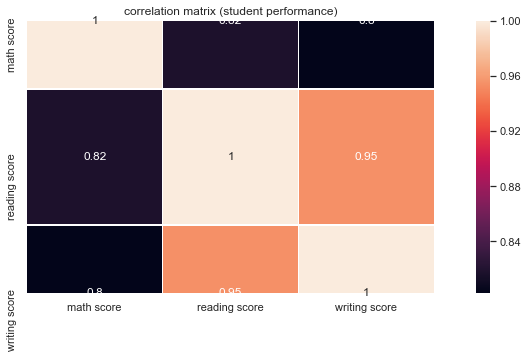

In [46]:
# make the correlation matrices.

corrmat_student = df.corr()

plt.figure(figsize=(15,5))

sns.heatmap(corrmat_student, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (student performance)")

plt.show()

## Reading and Writing scores are the most correlated.